# Autoencoder

## Preprocess

In [2]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import listdir
from os.path import isfile, join
import warnings

warnings.filterwarnings("ignore")

In [3]:
adl = pd.read_pickle("../data/data_adl.pkl")

In [4]:
df_pcfa1 = np.load("../npy/data_adl_pcfa1.npy")
df_pcfa1_varimax = np.load("../npy/data_adl_pcfa1_varimax.npy")
df_pcfa2 = np.load("../npy/data_adl_pcfa2.npy")
df_pcfa2_varimax = np.load("../npy/data_adl_pcfa2_varimax.npy")
df_pcfa3 = np.load("../npy/data_adl_pcfa2.npy")
df_pcfa3_varimax = np.load("../npy/data_adl_pcfa3_varimax.npy")

df_mlfa1 = np.load("../npy/data_adl_mlfa1.npy")
df_mlfa1_oblimin = np.load("../npy/data_adl_mlfa1_oblimin.npy")
df_mlfa1_varimax = np.load("../npy/data_adl_mlfa1_varimax.npy")
df_mlfa2 = np.load("../npy/data_adl_mlfa2.npy")
df_mlfa2_oblimin = np.load("../npy/data_adl_mlfa2_oblimin.npy")
df_mlfa2_varimax = np.load("../npy/data_adl_mlfa2_varimax.npy")
df_mlfa3 = np.load("../npy/data_adl_mlfa3.npy")
df_mlfa3_oblimin = np.load("../npy/data_adl_mlfa3_oblimin.npy")
df_mlfa3_varimax = np.load("../npy/data_adl_mlfa3_varimax.npy")

In [5]:
df_pca1 = np.load("../npy/data_adl_pca1.npy")
df_pca2 = np.load("../npy/data_adl_pca2.npy")
df_pca3 = np.load("../npy/data_adl_pca3.npy")

In [6]:
df_ae1 = np.load("../npy/data_adl_ae1.npy")
df_ae2 = np.load("../npy/data_adl_ae2.npy")
df_ae3 = np.load("../npy/data_adl_ae3.npy")

In [7]:
model_path = "../ae_codes/"
files = sorted([f for f in listdir(model_path) if isfile(join(model_path, f))])

ae_codes = []
bottlenecks = []
ops = []
for f in files:
    ae_codes.append(f)
    if len(f.split("_adam_")) > 1:
        bottleneck = int(f.split("_adam_")[0][-1])
        ops.append("adam")
    elif len(f.split("_adamw_")) > 1:
        bottleneck = int(f.split("_adamw_")[0][-1])
        ops.append("adamw")
    elif len(f.split("_sgdm_")) > 1:
        bottleneck = int(f.split("_sgdm_")[0][-1])
        ops.append("sgdm")
    else:
        bottleneck = 0
    bottlenecks.append(bottleneck)

In [80]:
grad_path = "../gradient/"
recon_path = "../recon/"
# ae_grad = list(map(lambda x: x.replace("encoded", "grad"), ae_codes))

## Results

### Function Definition

In [80]:
def correlation_plot(adl, ae_code, title="", ax=None, save=False, save_path="", show=False):
    ae1_corr = pd.concat([adl, ae_code], axis=1).corr()

    plt.figure(figsize=(10, 8))
    chart = sns.heatmap(ae1_corr, annot=True, fmt=".2f", linewidth=.5, cmap="mako", vmin=-1, vmax=1)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
    chart.set_yticklabels(chart.get_yticklabels(), rotation=30)
    chart.set(title=title)

    if save:
        try:
            plt.savefig(save_path)
        except:
            print("Error in saving figure.")
    if not show:
        plt.close()

In [122]:
def comparison_plot(df, col=[], title="", color="blue", ax=None):
    if ax:
        try:
            sns.scatterplot(x=df[:,0], y=df[:,1], color=color, size=1, legend=None).set(title=title)
            try:
                ax.set_xlabel(col[0])
                ax.set_ylabel(col[1])
            except:
                pass
        except:
            pass
    else:
        plt.figure(dpi=80)
        sns.scatterplot(x=df[:,0], y=df[:,1], color=color, size=1, legend=None).set(title=title)
        try:
            plt.xlabel(col[0])
            plt.ylabel(col[1])
        except:
            pass

In [76]:
def grad_plot(df, title="", save=False, save_path="", show=False):
    plot_num = df.shape[0]
    plt.figure(figsize=(8, 6))
    for i in range(plot_num):
        plt.plot(list(range(10)), df[i], '-o', label=f"Bottleneck {i+1}")
    plt.legend()
    plt.title(title)
    plt.xticks(range(10), [f"ADL{i+1}" for i in range(10)])
    plt.ylim(np.min(df) - 0.1, np.max(df) + 0.1)
    
    if save:
        try:
            plt.savefig(save_path)
        except:
            print("Error in saving figure.")
    if not show:
        plt.close()

### Autoencoder & Inputs

#### Correlation

In [52]:
pd_ae1 = pd.DataFrame(df_ae1, columns=["Bottleneck_1"])
pd_ae2 = pd.DataFrame(df_ae2, columns=["Bottleneck_1", "Bottleneck_2"])
pd_ae3 = pd.DataFrame(df_ae3, columns=["Bottleneck_1", "Bottleneck_2", "Bottleneck_3"])

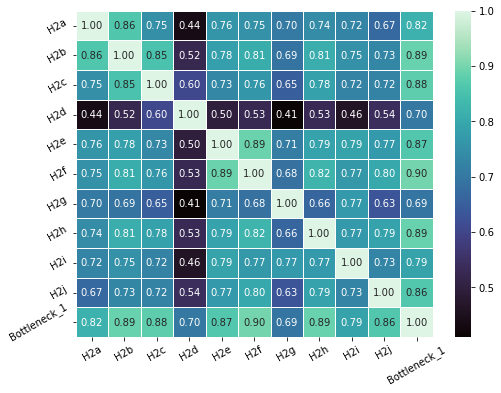

In [67]:
ae1_corr = pd.concat([adl, pd_ae1], axis=1).corr()
col_names = ae1_corr.columns

plt.figure(figsize=(8, 6))
chart = sns.heatmap(ae1_corr, annot=True, fmt=".2f", linewidth=.5, cmap="mako")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set_yticklabels(chart.get_yticklabels(), rotation=30);

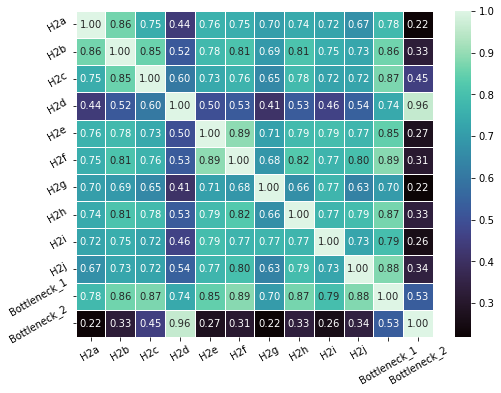

In [65]:
ae2_corr = pd.concat([adl, pd_ae2], axis=1).corr()
col_names = ae2_corr.columns

plt.figure(figsize=(8, 6))
chart = sns.heatmap(ae2_corr, annot=True, fmt=".2f", linewidth=.5, cmap="mako")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set_yticklabels(chart.get_yticklabels(), rotation=30);

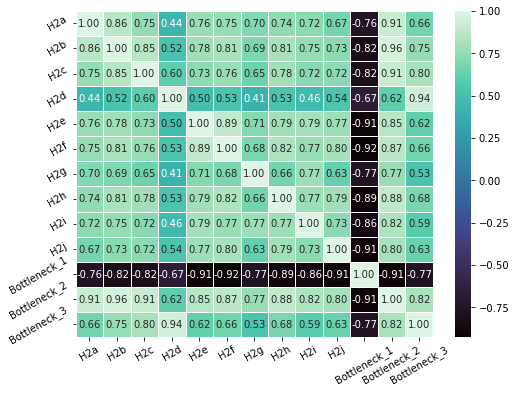

In [66]:
ae3_corr = pd.concat([adl, pd_ae3], axis=1).corr()
col_names = ae3_corr.columns

plt.figure(figsize=(8, 6))
chart = sns.heatmap(ae3_corr, annot=True, fmt=".2f", linewidth=.5, cmap="mako")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set_yticklabels(chart.get_yticklabels(), rotation=30);

In [83]:
if not os.path.exists("../fig/ae_corr/"):
    os.mkdir("../fig/ae_corr/")

for f in files:
    index = files.index(f)
    bottleneck = bottlenecks[index]
    # op = ops[index]
    fname = f.split("best_model_")[-1].split("_encoded")[0]
    if "fcn1" in f:
        name, layer1, _, op, lr, bs = fname.split("_")
    elif "fcn2" in f:
        name, layer1, layer2, _, op, lr, bs = fname.split("_")
    if bottleneck:
        cols = [f"Bottleneck_{i+1}" for i in range(bottleneck)]
        ae_code = pd.DataFrame(np.load(model_path + f), columns=cols)
        if name == "fcn1":
            title = f"Correlation plot of ADL variables and encoded codes: {name.upper()}({layer1},{bottleneck},{layer1}) with {op}"
        elif name == "fcn2":
            title = f"Correlation plot of ADL variables and encoded codes: {name.upper()}({layer1},{layer2},{bottleneck},{layer2},{layer1}) with {op}"
        correlation_plot(adl, ae_code, title=title, ax=None, save=True, save_path=f"../fig/ae_corr/ae_{fname}_corr.png")

#### Scatter Plot

In [84]:
adl_ae1 = pd.concat([adl, pd_ae1], axis=1)
adl_ae2 = pd.concat([adl, pd_ae2], axis=1)
adl_ae3 = pd.concat([adl, pd_ae3], axis=1)

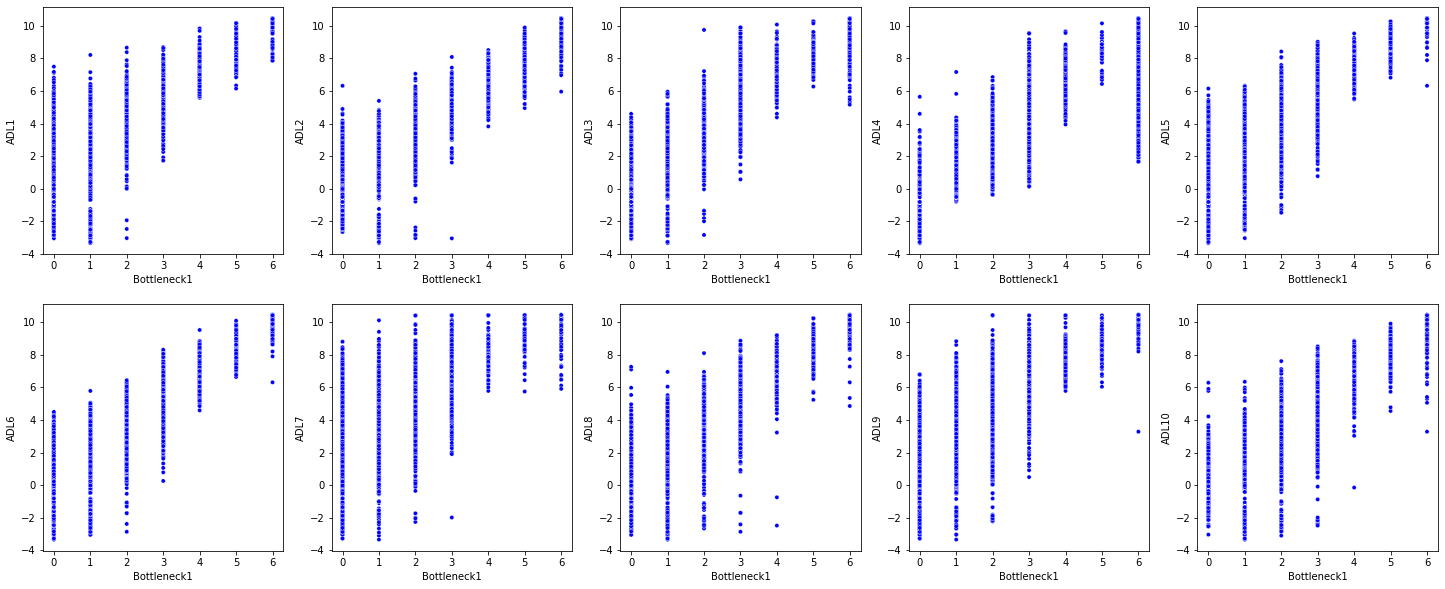

In [91]:
factor_num = 1
factor = 1
width = 5
row_num = 5
col_num = 2 * factor_num

fig = plt.figure(figsize=(width * row_num, width * col_num))
gs = fig.add_gridspec(col_num, row_num)
ax = [None] * 10 * factor_num
for i in range(col_num):
    for j in range(row_num):
        index = i * row_num + j
        ax[index] = fig.add_subplot(gs[i, j])
        comparison_plot(
            np.column_stack((adl_ae1.to_numpy()[:,index], adl_ae1.to_numpy()[:,10])), 
            col=[f"Bottleneck{factor}", f"ADL{index+1}"], 
            title="", 
            ax=ax[index]
        )

In [137]:
colors = ["blue", "red", "green"]
width = 5
row_num = 5
col_num = 2

if not os.path.exists("../fig/ae_scatter/"):
    os.mkdir("../fig/ae_scatter/")

for f in files:
    index = files.index(f)
    bottleneck = bottlenecks[index]
    # op = ops[index]
    fname = f.split("best_model_")[-1].split("_encoded")[0]
    if "fcn1" in f:
        name, layer1, _, op, lr, bs = fname.split("_")
    elif "fcn2" in f:
        name, layer1, layer2, _, op, lr, bs = fname.split("_")
    if bottleneck:
        cols = [f"Bottleneck_{i+1}" for i in range(bottleneck)]
        ae_code = pd.DataFrame(np.load(model_path + f), columns=cols)
        if name == "fcn1":
            title = f"Scatter plot of ADL variables and encoded codes: {name.upper()}({layer1},{bottleneck},{layer1}) with {op}"
        elif name == "fcn2":
            title = f"Scatter plot of ADL variables and encoded codes: {name.upper()}({layer1},{layer2},{bottleneck},{layer2},{layer1}) with {op}"

        fig = plt.figure(figsize=(width * row_num, width * col_num * bottleneck))
        gs = fig.add_gridspec(col_num * bottleneck, row_num)
        ax = [None] * (10 * bottleneck)
        for factor in range(bottleneck):
            color = colors[factor]
            for i in range(col_num):
                for j in range(row_num):
                    index = factor * 10 + i * row_num + j
                    ax[index] = fig.add_subplot(gs[i + factor * 2, j])
                    comparison_plot(
                        np.column_stack((adl.to_numpy()[:,index%10], ae_code.to_numpy()[:,factor])), 
                        col=[f"Bottleneck{factor+1}", f"ADL{index+1}"], 
                        title="", 
                        color=color,
                        ax=ax[index]
                    )
        plt.savefig(f"../fig/ae_scatter/ae_{fname}_scatter.png")
        plt.close()

#### Gradients

In [64]:
if not os.path.exists("../fig/ae_grad/"):
    os.mkdir("../fig/ae_grad/")

In [77]:
for _f in files:
    index = files.index(_f)
    bottleneck = bottlenecks[index]
    f = _f.replace("encoded", "grad")
    # op = ops[index]
    fname = f.split("best_model_")[-1].split("_grad")[0]
    if "fcn1" in f:
        name, layer1, _, op, lr, bs = fname.split("_")
    elif "fcn2" in f:
        name, layer1, layer2, _, op, lr, bs = fname.split("_")
    if bottleneck:
        df = np.load(grad_path + f)
        if name == "fcn1":
            title = f"Gradients plot of codes w.r.t. ADL: {name.upper()}({layer1},{bottleneck},{layer1}) with {op}"
        elif name == "fcn2":
            title = f"Gradients plot of codes w.r.t. ADL: {name.upper()}({layer1},{layer2},{bottleneck},{layer2},{layer1}) with {op}"
        # print(fname, title)
        grad_plot(df, title, save=True, save_path=f"../fig/ae_grad/ae_{fname}_grad.png")

#### Comparison of means between raw and autoencoder reconstructed ADL variables

In [111]:
means = []
means_rows = []

adl_mean = np.mean(np.array(adl), axis=0)
means.append(list(np.mean(np.array(adl), axis=0)))
means_rows.append("Raw ADL")

for _f in files:
    index = files.index(_f)
    bottleneck = bottlenecks[index]
    f = _f.replace("encoded", "recon")
    # op = ops[index]
    fname = f.split("best_model_")[-1].split("_recon")[0]
    if "fcn1" in f:
        name, layer1, _, op, lr, bs = fname.split("_")
    elif "fcn2" in f:
        name, layer1, layer2, _, op, lr, bs = fname.split("_")
    if bottleneck:
        df = np.load(recon_path + f)
        recon_mean = list(np.mean(df, axis=0))
        means.append(recon_mean)
        if name == "fcn1":
            model_name = f"{name.upper()}({layer1},{bottleneck},{layer1}) with {op}"
        elif name == "fcn2":
            model_name = f"{name.upper()}({layer1},{layer2},{bottleneck},{layer2},{layer1}) with {op}"
        means_rows.append(model_name)

In [130]:
means_rows_df = pd.DataFrame(means_rows, columns=["Model"])
means_df = pd.DataFrame(np.array(means), columns=[f"ADL{i+1}" for i in range(10)])
means_df_shift = means_df - adl_mean
means_df_shift["MAE"] = np.sum(np.abs(means_df_shift), axis=1) / 10
means_df = np.round(means_df, 4)
means_df_shift = np.round(means_df_shift, 4)
means_final = pd.concat([means_rows_df, means_df], axis=1)
means_shift_final = pd.concat([means_rows_df, means_df_shift], axis=1)

In [132]:
if not os.path.exists("../table/"):
    os.mkdir("./table/")

writer = pd.ExcelWriter('../table/ae_means_comparison.xlsx', engine='xlsxwriter')

means_final.to_excel(writer, sheet_name='means', index=False)
means_shift_final.to_excel(writer, sheet_name='means_diff', index=False)

writer.close()

### 1-Bottleneck Autoencoder & 1-Factor FA & 1-PC PCA

In [13]:
plot_num = 3
size = 6
factor_num = 1

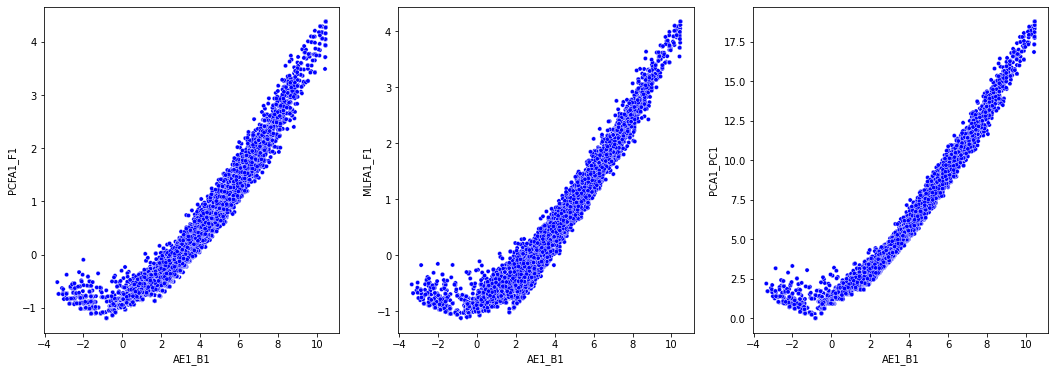

In [14]:
fig = plt.figure(figsize=(size * plot_num, size))
gs = fig.add_gridspec(1, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae1[:,0], df_pcfa1[:,0])), col=[f"AE{factor_num}_B{factor_num}", f"PCFA{factor_num}_F{factor_num}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae1[:,0], df_mlfa1[:,0])), col=[f"AE{factor_num}_B{factor_num}", f"MLFA{factor_num}_F{factor_num}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[0, 2])
comparison_plot(np.column_stack((df_ae1[:,0],  df_pca1[:,0])), col=[f"AE{factor_num}_B{factor_num}", f"PCA{factor_num}_PC{factor_num}"], title="", ax=ax3)

### 2-Bottleneck Autoencoder & 2-Factor FA & 2-PC PCA

In [15]:
plot_num = 2
size = 5
factor_num = 2

#### AE Bottleneck_1 Plots

In [16]:
ae_dim_index = 1

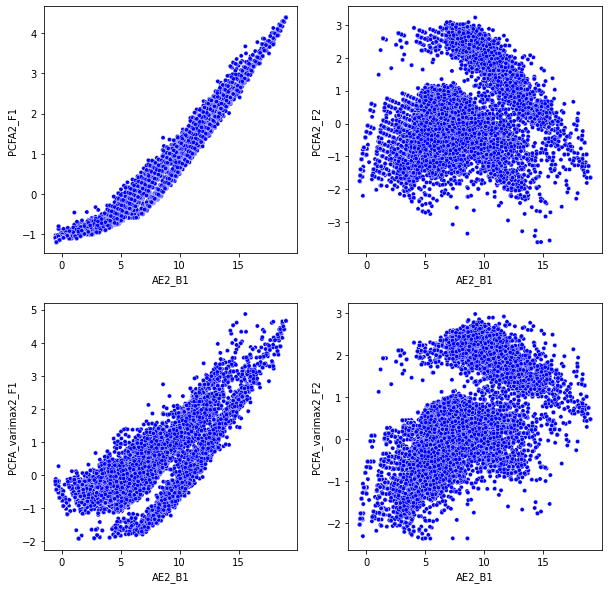

In [17]:
fig = plt.figure(figsize=(size * plot_num, size * 2))
gs = fig.add_gridspec(2, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{2}"], title="", ax=ax4)

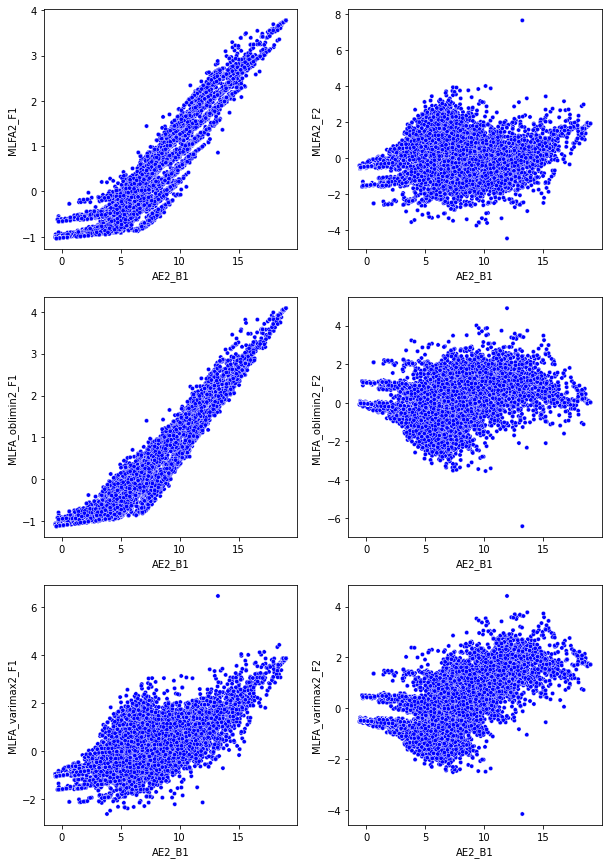

In [18]:
fig = plt.figure(figsize=(size * plot_num, size * 3))
gs = fig.add_gridspec(3, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_oblimin[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_oblimin[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{2}"], title="", ax=ax4)
ax5 = fig.add_subplot(gs[2, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{1}"], title="", ax=ax5)
ax6 = fig.add_subplot(gs[2, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{2}"], title="", ax=ax6)

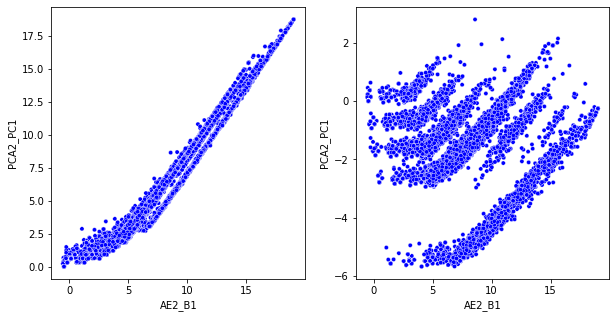

In [19]:
fig = plt.figure(figsize=(size * plot_num, size))
gs = fig.add_gridspec(1, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_pca2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_pca2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax2)

#### AE Bottleneck_2 Plots

In [20]:
ae_dim_index = 2

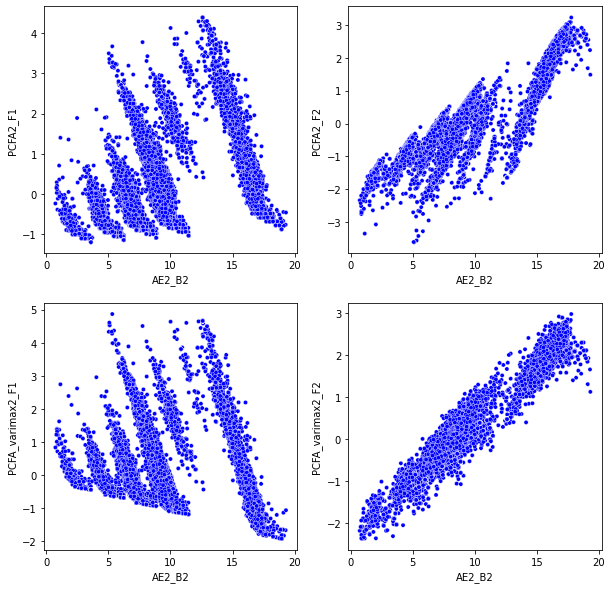

In [21]:
fig = plt.figure(figsize=(size * plot_num, size * 2))
gs = fig.add_gridspec(2, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{2}"], title="", ax=ax4)

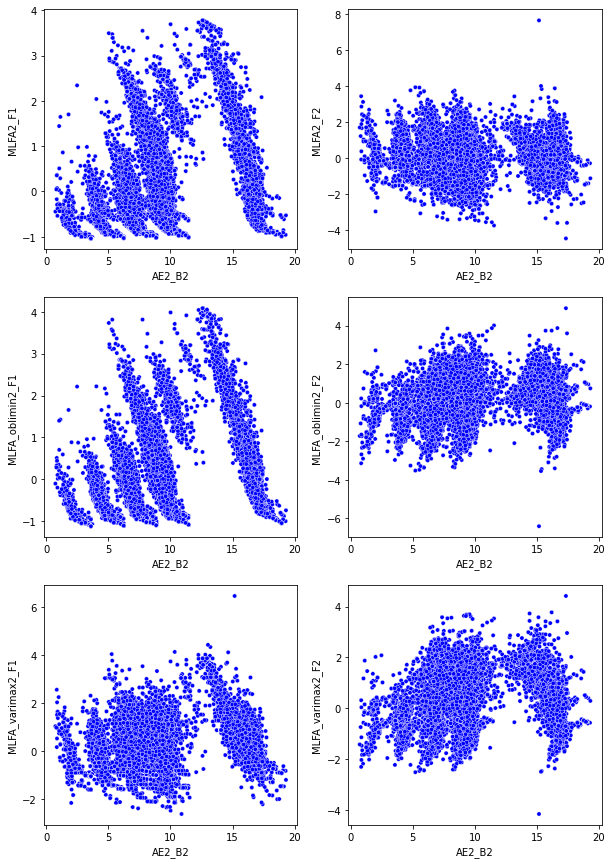

In [22]:
fig = plt.figure(figsize=(size * plot_num, size * 3))
gs = fig.add_gridspec(3, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_oblimin[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_oblimin[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{2}"], title="", ax=ax4)
ax5 = fig.add_subplot(gs[2, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{1}"], title="", ax=ax5)
ax6 = fig.add_subplot(gs[2, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{2}"], title="", ax=ax6)

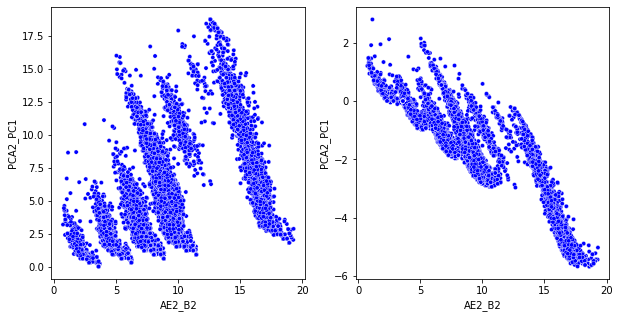

In [23]:
fig = plt.figure(figsize=(size * plot_num, size))
gs = fig.add_gridspec(1, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_pca2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_pca2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax2)

### Autoencoder vs PCA

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_ae2_std = scaler.fit_transform(df_ae2)

scaler = StandardScaler()
df_pca2_std = scaler.fit_transform(df_pca2)

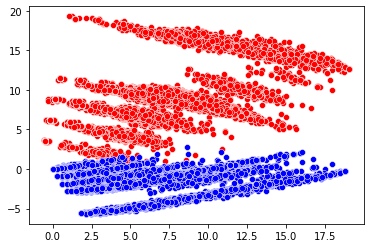

In [27]:
sns.scatterplot(x=df_ae2[:,0], y=df_ae2[:,1], color="red")
sns.scatterplot(x=df_pca2[:,0], y=df_pca2[:,1], color="blue");

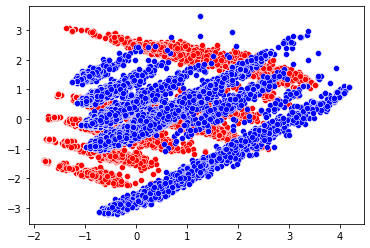

In [28]:
sns.scatterplot(x=df_ae2_std[:,0], y=df_ae2_std[:,1], color="red")
sns.scatterplot(x=df_pca2_std[:,0], y=df_pca2_std[:,1], color="blue");